# Exploratory Data Analysis

## Getting Started
### Libraries to Import

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Read in Data

This is a fairly common dataset, here sourced from [data.world](https://data.world/data-society/capital-bikeshare-2011-2012), but also available from the UCI database. It details hundreds of thousands of Capital Bikeshare rides in 2011 and 2012 sampled every hour, including features for temporal factors, weather conditions, and registered versus casual users. 

In [2]:
df = pd.read_csv('Data/bike_data.csv')

## Data Cleaning

Our date column was an object, so transform to a datetime with pandas and create a new column for Month.

In [3]:
df.Date = pd.to_datetime(arg=df.Date) #dtype('<M8[ns]')
df['Month'] = df['Date'].dt.month

In [4]:
df.head(5)

,Date,Season,Hour,Holiday,Day of the Week,Working Day,Weather Type,Temperature F,Temperature Feels F,Humidity,Wind Speed,Casual Users,Registered Users,Total Users,Month
0,2011-01-01,4,0,0,6,0,1,36.6,37.4,81,0,3,13,16,1
1,2011-01-01,4,1,0,6,0,1,34.9,35.6,80,0,8,32,40,1
2,2011-01-01,4,2,0,6,0,1,34.9,35.6,80,0,5,27,32,1
3,2011-01-01,4,3,0,6,0,1,36.6,37.4,75,0,3,10,13,1
4,2011-01-01,4,4,0,6,0,1,36.6,37.4,75,0,0,1,1,1


## Data Visualization

### Total Users Per Hour

We see spikes during rush hour (8 am and 5-6 pm) due to business travel, as expected. We see a dropoff in ridership before 6 am and after 8 pm.

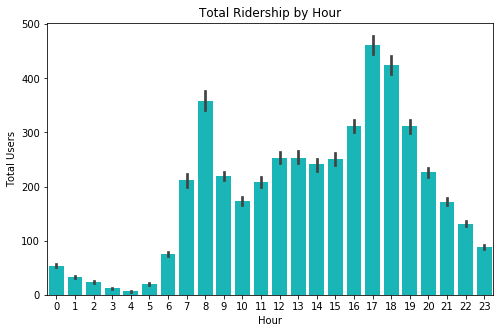

In [22]:
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='Hour', y = 'Total Users', color = 'darkturquoise').set_title('Total Ridership by Hour')
plt.show()

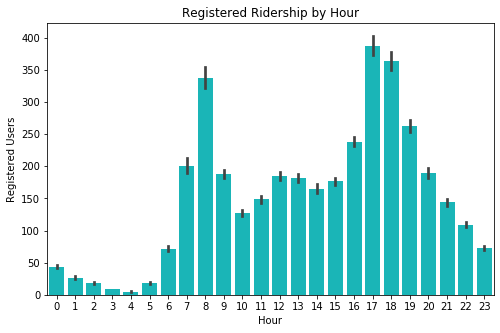

In [25]:
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='Hour', y = 'Registered Users', color = 'darkturquoise').set_title('Registered Ridership by Hour')
plt.show()

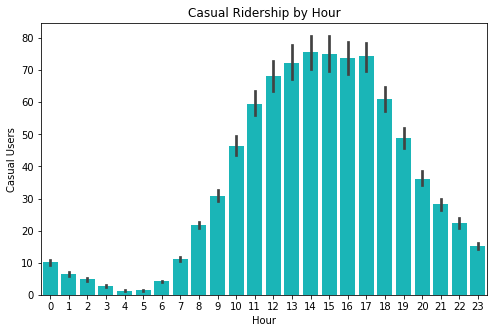

In [29]:
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='Hour', y = 'Casual Users', color = 'darkturquoise').set_title('Casual Ridership by Hour')
plt.show()

### Temperature Distributions

There is an interesting bimodal distribution of actual temperature in Fahrenheit. There are spikes at ~45 and ~70 degrees. We will see how this affects ridership later.

In [6]:
temp_f_range = [df['Temperature F'].min(), df['Temperature F'].max()]
print('The overall range of actual temperatures is: ', temp_f_range)

The overall range of actual temperatures is:  [17.6, 102.2]


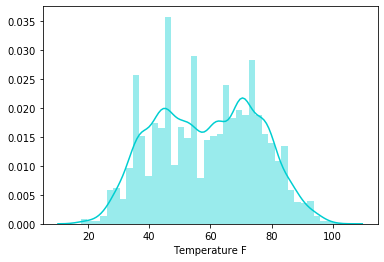

In [7]:
sns.distplot(df['Temperature F'], bins = 40, color = 'darkturquoise')
plt.show()

Accounting for humidity/wind, we generate the "Feels Like" temperature which generally created more extremes than the raw temperature. The minimum temperature fell to 3 degrees and the maximum temperature rose to 122 degrees.

In [8]:
temp_feels_f_range = [df['Temperature Feels F'].min(), df['Temperature Feels F'].max()]
print('The overall range of actual temperatures is: ', temp_feels_f_range)

The overall range of actual temperatures is:  [3.2, 122.0]


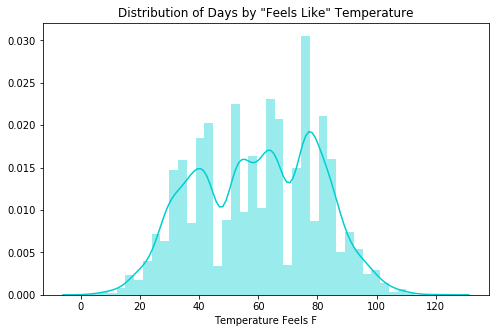

In [9]:
plt.figure(figsize=(8,5))
sns.distplot(df['Temperature Feels F'], bins = 40, color = 'darkturquoise').set_title(
    'Distribution of Days by "Feels Like" Temperature')
plt.show()

### Weather Type

The weather on each day was classified according to the descriptions below:

Weather Type:

- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

As expected, there is a negative relationship between ridership and weather severity. By using the same y-axis for both populations, we also see that registered users are the main contributors to overall ridership and are more likely to ride even in poor conditions.

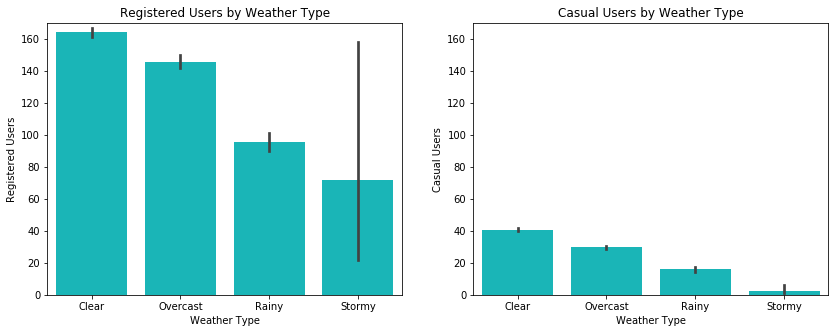

In [10]:
fig, ax = plt.subplots(1,2)
sns.barplot(data=df, x = 'Weather Type', y = 'Registered Users', color = 'darkturquoise', ax = ax[0]
                    ).set_xticklabels(['Clear','Overcast','Rainy','Stormy'])
sns.barplot(data=df, x = 'Weather Type', y = 'Casual Users', color = 'darkturquoise', ax = ax[1]
                   ).set_xticklabels(['Clear','Overcast','Rainy','Stormy'])
ax[0].set_title('Registered Users by Weather Type')
ax[1].set_title('Casual Users by Weather Type')
ax[0].set(ylim=(0, 170))
ax[1].set(ylim=(0, 170))
fig.set_figheight(5)
fig.set_figwidth(14)
plt.show()

### Day of the Week

As above, registered users make up a majority of ridership. However, we see different patterns in our two cohorts relating to the days of the week. Registered users, who are more likely to be business travelers, have heavier usage during the workweek and less on the weekends. Casual users are the opposite, they are much more likely to ride on the weekends for leisure.

If we did not split these two populations apart, the overall ridership is almost identical regardless of day, because the lack of registered riders on the weekends are compensated for by casual riders. This is a good lesson on understanding your customer segmentations and how different consumer behaviors are represented or obscured in the raw data.

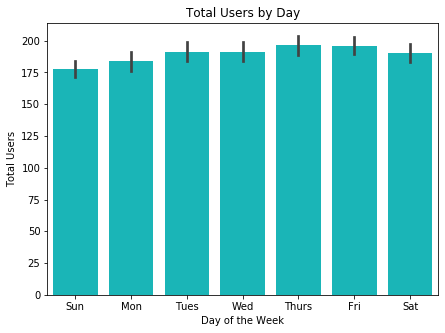

In [21]:
fig, ax = plt.subplots(figsize=(7, 5))
sns.barplot(data=df, x = 'Day of the Week', y = 'Total Users', color = 'darkturquoise'
           ).set_xticklabels(['Sun', 'Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat'])
plt.title('Total Users by Day')
plt.show()

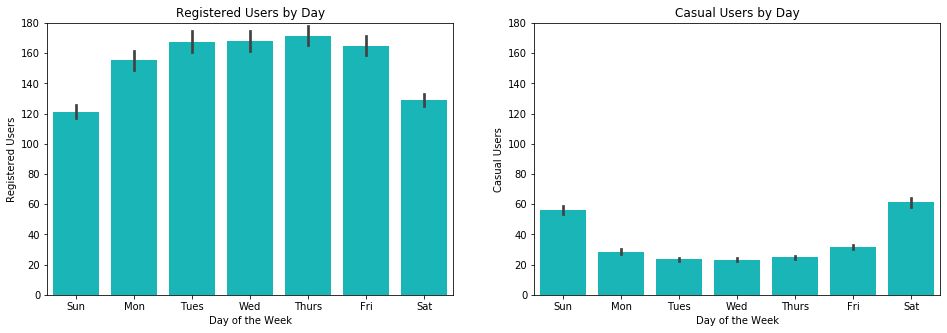

In [11]:
fig, ax = plt.subplots(1,2)
sns.barplot(data=df, x = 'Day of the Week', y = 'Registered Users', color = 'darkturquoise', ax = ax[0]
                    ).set_xticklabels(['Sun', 'Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat'])
sns.barplot(data=df, x = 'Day of the Week', y = 'Casual Users', color = 'darkturquoise', ax = ax[1]
                   ).set_xticklabels(['Sun', 'Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat'])
ax[0].set(ylim=(0, 180))
ax[1].set(ylim=(0, 180))
ax[0].set_title('Registered Users by Day')
ax[1].set_title('Casual Users by Day')
fig.set_figheight(5)
fig.set_figwidth(16)
plt.show()

### Holidays

As is the pattern, registered riders account for a majority of all rides regardless of if that day is a holiday. Many holidays are not given off so most business travelers will still need to bike. Casual riders are slightly more likely to bike on a holiday, but not significantly.

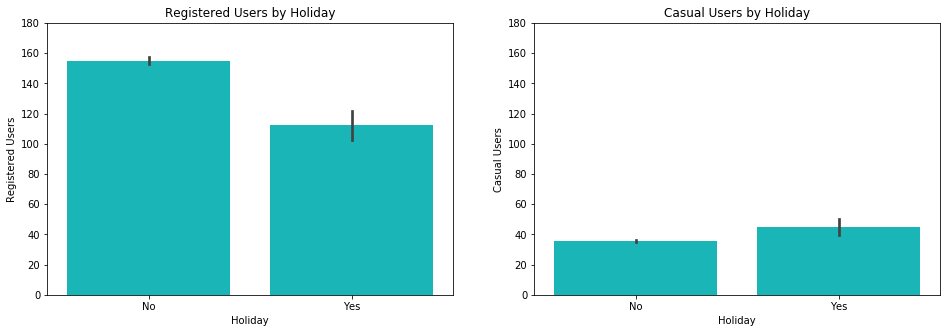

In [12]:
fig, ax = plt.subplots(1,2)
sns.barplot(data=df, x = 'Holiday', y = 'Registered Users', color = 'darkturquoise', ax = ax[0]
                    ).set_xticklabels(['No', 'Yes'])
sns.barplot(data=df, x = 'Holiday', y = 'Casual Users', color = 'darkturquoise', ax = ax[1]
                   ).set_xticklabels(['No', 'Yes'])
ax[0].set(ylim=(0, 180))
ax[1].set(ylim=(0, 180))
ax[0].set_title('Registered Users by Holiday')
ax[1].set_title('Casual Users by Holiday')
fig.set_figheight(5)
fig.set_figwidth(16)
plt.show()

### Time Series - Daily

We have two years of data, so slicing to isolate each year's data, we see the following time series. As expected, ridership is higher in the spring and summer months and drops off during the winter in both years. We also see strong dips around Easter and Halloween. Comparing 2011 to 2012, we see an overall increase in the number of riders as well as monthly increase in March/April.

In [13]:
df_2011 = df.loc[df['Date'].dt.year == 2011]
df_2012 = df.loc[df['Date'].dt.year == 2012]

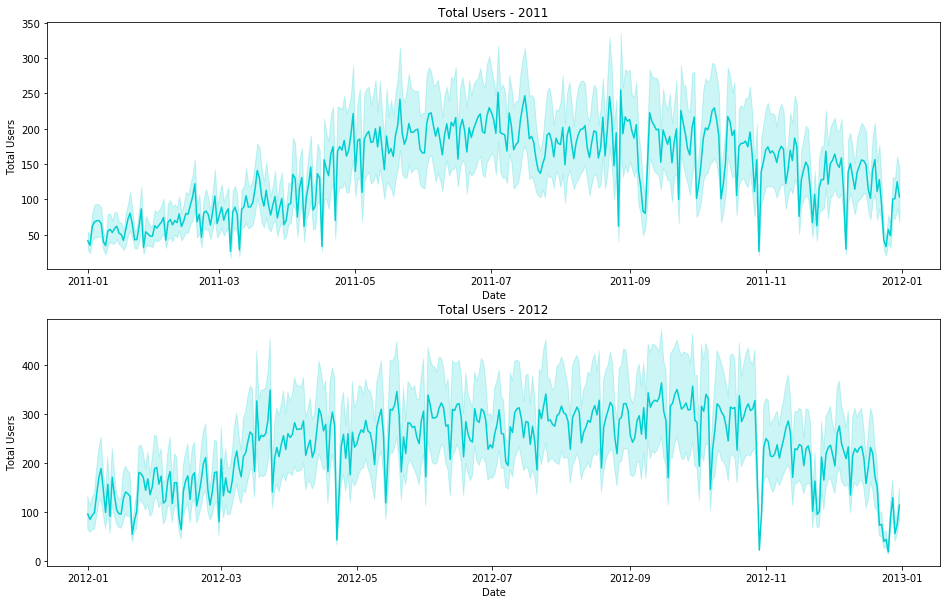

In [14]:
fig, ax = plt.subplots(2,1)
sns.lineplot(x=df_2011.Date, y=df_2011['Total Users'], color = 'darkturquoise', ax = ax[0])
sns.lineplot(x=df_2012.Date, y=df_2012['Total Users'], color = 'darkturquoise', ax = ax[1])
ax[0].set_title('Total Users - 2011')
ax[1].set_title('Total Users - 2012')
fig.set_figheight(10)
fig.set_figwidth(16)
plt.show()

### Time Series - Monthly

Aggregating the two years and resampling by month, we see the strong trend above represented more clearly. The spring and summer months have the higher ridership that drops off in the winter. The strong differences between our registered and casual segments are, again, quite clear. 

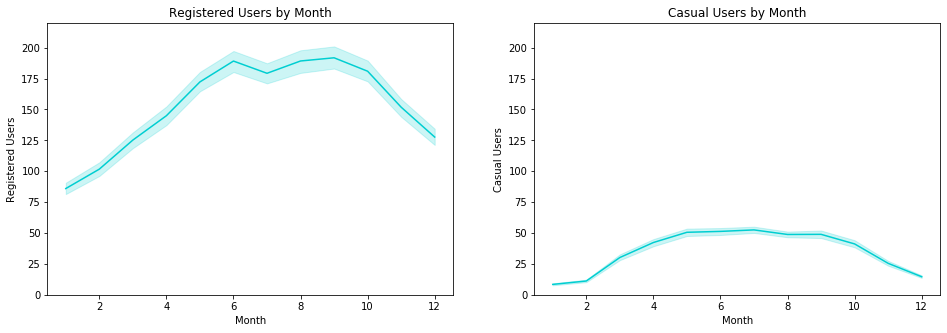

In [15]:
fig, ax = plt.subplots(1,2)
sns.lineplot(data=df, x = 'Month', y = 'Registered Users', color = 'darkturquoise', ax = ax[0])
sns.lineplot(data=df, x = 'Month', y = 'Casual Users', color = 'darkturquoise', ax = ax[1])
ax[0].set_title('Registered Users by Month')
ax[1].set_title('Casual Users by Month')
ax[0].set(ylim=(0, 220))
ax[1].set(ylim=(0, 220))
fig.set_figheight(5)
fig.set_figwidth(16)
plt.show()

## Correlations

In [16]:
corr = df.corr()
corr.style.background_gradient(cmap='twilight_shifted').set_precision(2)

,Season,Hour,Holiday,Day of the Week,Working Day,Weather Type,Temperature F,Temperature Feels F,Humidity,Wind Speed,Casual Users,Registered Users,Total Users,Month
Season,1.00,0.00,0.06,-0.00,-0.04,0.04,-0.47,-0.47,0.01,-0.04,-0.23,-0.10,-0.14,0.21
Hour,0.00,1.00,0.00,-0.00,0.00,-0.02,0.14,0.13,-0.28,0.14,0.30,0.37,0.39,-0.01
Holiday,0.06,0.00,1.00,-0.10,-0.25,-0.02,-0.03,-0.03,-0.01,0.00,0.03,-0.05,-0.03,0.02
Day of the Week,-0.00,-0.00,-0.10,1.00,0.04,0.00,-0.00,-0.01,-0.04,0.01,0.03,0.02,0.03,0.01
Working Day,-0.04,0.00,-0.25,0.04,1.00,0.04,0.06,0.05,0.02,-0.01,-0.30,0.13,0.03,-0.00
Weather Type,0.04,-0.02,-0.02,0.00,0.04,1.00,-0.10,-0.11,0.42,0.03,-0.15,-0.12,-0.14,0.01
Temperature F,-0.47,0.14,-0.03,-0.00,0.06,-0.10,1.00,0.99,-0.07,-0.02,0.46,0.34,0.40,0.20
Temperature Feels F,-0.47,0.13,-0.03,-0.01,0.05,-0.11,0.99,1.00,-0.05,-0.06,0.45,0.33,0.40,0.21
Humidity,0.01,-0.28,-0.01,-0.04,0.02,0.42,-0.07,-0.05,1.00,-0.29,-0.35,-0.27,-0.32,0.16
Wind Speed,-0.04,0.14,0.00,0.01,-0.01,0.03,-0.02,-0.06,-0.29,1.00,0.09,0.08,0.09,-0.14


We see some expected correlations, mainly actual temperature versus "feels like" temperature as the latter is a modified version of the former accounting for Humidity/Wind. We also see various environmental factors loosely correlated with Season. Finally, in terms of our ridership, we see a positive relationship between temperature and riders as well as hours and riders. 

Our subsets of riders should show strong multicollinearity because Total Users = Casual Users + Registered Users.